### Jupyter notebook about retail stocks performance in Brazilian market!

In [75]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [76]:
ativos = ['VIIA3','MGLU3', 'LREN3', 'GUAR3', 'CEAB3', 'ARZZ3']

In [77]:
ativos = [i + '.SA' for i in ativos]

In [78]:
inicio = '2022-02-01'
fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yes_str = yesterday.strftime('%Y-%m-%d')
#yesterday =  datetime.date.today() - datetime.timedelta(days=1)

yes_str

'2023-08-21'

In [79]:
df = yf.download(ativos, start = inicio, end = yes_str)['Adj Close']

[                       0%                       ]

[*********************100%***********************]  6 of 6 completed


In [80]:
df.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-14,78.330002,6.62,6.81,17.570000,2.84,1.72
2023-08-15,81.300003,6.56,7.16,17.440001,2.77,1.69
2023-08-16,81.180000,6.43,6.92,17.490000,2.97,1.79
2023-08-17,80.269997,6.17,6.81,17.110001,2.82,1.68
2023-08-18,79.110001,6.23,6.89,17.360001,3.00,1.68


#### normalizando os ativos


In [81]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

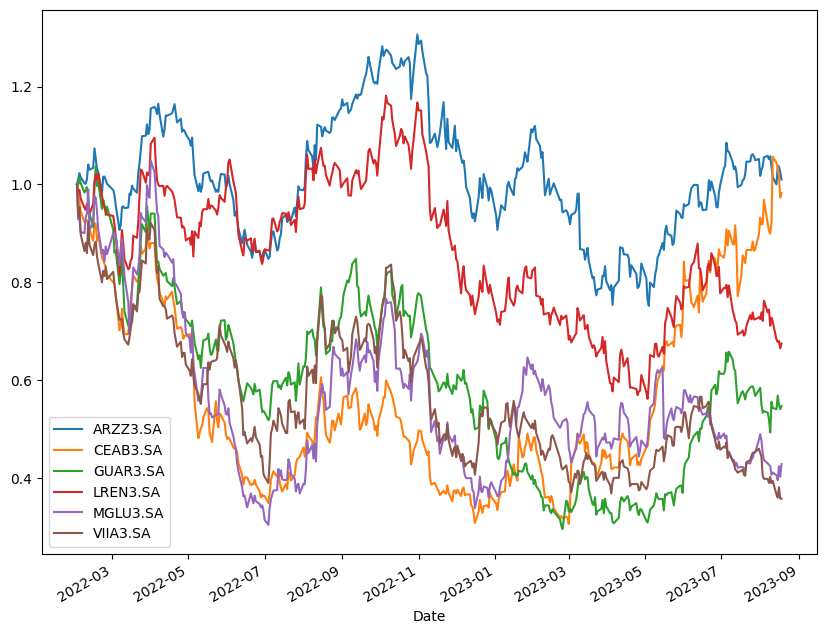

In [82]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [83]:
primeiro = df.iloc[0]

In [84]:
primeiro

ARZZ3.SA    78.317413
CEAB3.SA     6.340000
GUAR3.SA    12.600346
LREN3.SA    25.734549
MGLU3.SA     7.010000
VIIA3.SA     4.700000
Name: 2022-02-01 00:00:00, dtype: float64

In [85]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [86]:
comprados = 10000/primeiro

In [87]:
comprados

ARZZ3.SA     127.685525
CEAB3.SA    1577.287028
GUAR3.SA     793.629025
LREN3.SA     388.582686
MGLU3.SA    1426.533477
VIIA3.SA    2127.659661
Name: 2022-02-01 00:00:00, dtype: float64

In [88]:
# Número de papéis arredondados
round(comprados, 0)

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

In [89]:
comprados = round(comprados, 0)

In [90]:
comprados

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [91]:
PL = df*comprados
#PL=df*qntd

In [92]:
PL.head()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2022-02-01,10024.628906,9998.180241,10004.674416,10010.739393,10003.270327,10001.599594
2022-02-02,10133.376953,9793.170060,9996.857660,9866.032978,9289.770327,9363.200203
2022-02-03,10255.717773,9651.239820,10145.364653,9895.716516,9318.310299,9533.440041
2022-02-04,10170.449219,9446.229639,10028.123167,9721.326563,9032.909891,8980.159554
2022-02-07,10053.050781,9225.449850,9840.534670,9532.094469,9004.369918,8639.679878


In [93]:
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA
Date,,,,,,
2023-08-14,10026.240234,10439.739820,5407.139955,6834.729881,4052.679878,3660.160061
2023-08-15,10406.400391,10345.119910,5685.039879,6784.160208,3952.789973,3596.320122
2023-08-16,10391.040039,10140.109729,5494.480061,6803.609911,4238.190041,3809.119919
2023-08-17,10274.559570,9730.090120,5407.139955,6655.790237,4024.139905,3575.039888
2023-08-18,10126.080078,9824.710030,5470.659894,6753.040237,4281.000000,3575.039888


In [94]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [95]:
#PL.head()
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,
2023-08-14,10026.240234,10439.739820,5407.139955,6834.729881,4052.679878,3660.160061,40420.689828
2023-08-15,10406.400391,10345.119910,5685.039879,6784.160208,3952.789973,3596.320122,40769.830482
2023-08-16,10391.040039,10140.109729,5494.480061,6803.609911,4238.190041,3809.119919,40876.549700
2023-08-17,10274.559570,9730.090120,5407.139955,6655.790237,4024.139905,3575.039888,39666.759676
2023-08-18,10126.080078,9824.710030,5470.659894,6753.040237,4281.000000,3575.039888,40030.530128


In [96]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [97]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [98]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [99]:
ibov = ibov[['Ibov']]

In [100]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-08-10,118350.0
2023-08-11,118065.0
2023-08-14,116810.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [101]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [102]:
novo_df.head()

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2022-02-01,113147.0,10024.628906,9998.180241,10004.674416,10010.739393,10003.270327,10001.599594,60043.092876
2022-02-02,112161.0,10133.376953,9793.170060,9996.857660,9866.032978,9289.770327,9363.200203,58442.408181
2022-02-03,111696.0,10255.717773,9651.239820,10145.364653,9895.716516,9318.310299,9533.440041,58799.789102
2022-02-04,112245.0,10170.449219,9446.229639,10028.123167,9721.326563,9032.909891,8980.159554,57379.198032
2022-02-07,111996.0,10053.050781,9225.449850,9840.534670,9532.094469,9004.369918,8639.679878,56295.179566


<Axes: xlabel='Date'>

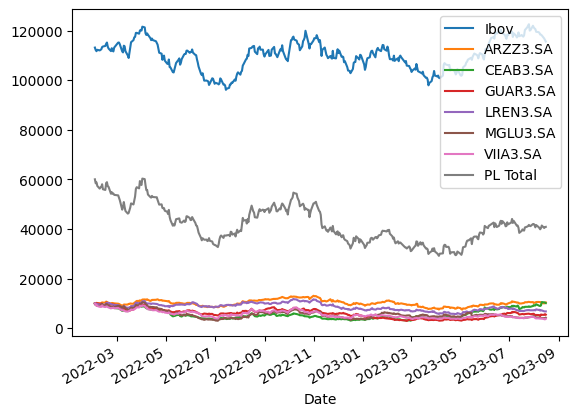

In [103]:
novo_df.plot()

In [104]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [105]:
novo_normalizado

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,101.084809,97.949525,99.921869,98.554488,92.867333,93.617027,97.334107
2022-02-03,98.717597,102.305211,96.529964,101.406245,98.851005,93.152639,95.319153,97.929314
2022-02-04,99.202807,101.454621,94.479489,100.234378,97.108976,90.299568,89.787233,95.563362
2022-02-07,98.982739,100.283520,92.271290,98.359369,95.218686,90.014262,86.382981,93.757961
...,...,...,...,...,...,...,...,...
2023-08-10,104.598443,103.616805,92.113565,55.554032,72.742676,40.656203,38.936173,67.281927
2023-08-11,104.346558,101.497221,105.678228,54.284227,71.926656,41.084166,39.361704,68.981340
2023-08-14,103.237381,100.016074,104.416399,54.046136,68.273977,40.513550,36.595747,67.319467


<Axes: xlabel='Date'>

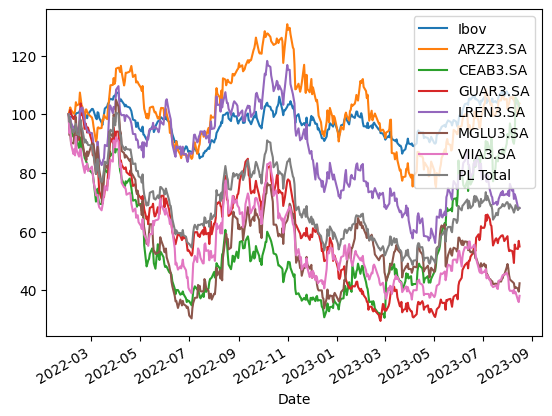

In [106]:
novo_normalizado.plot()

<Axes: >

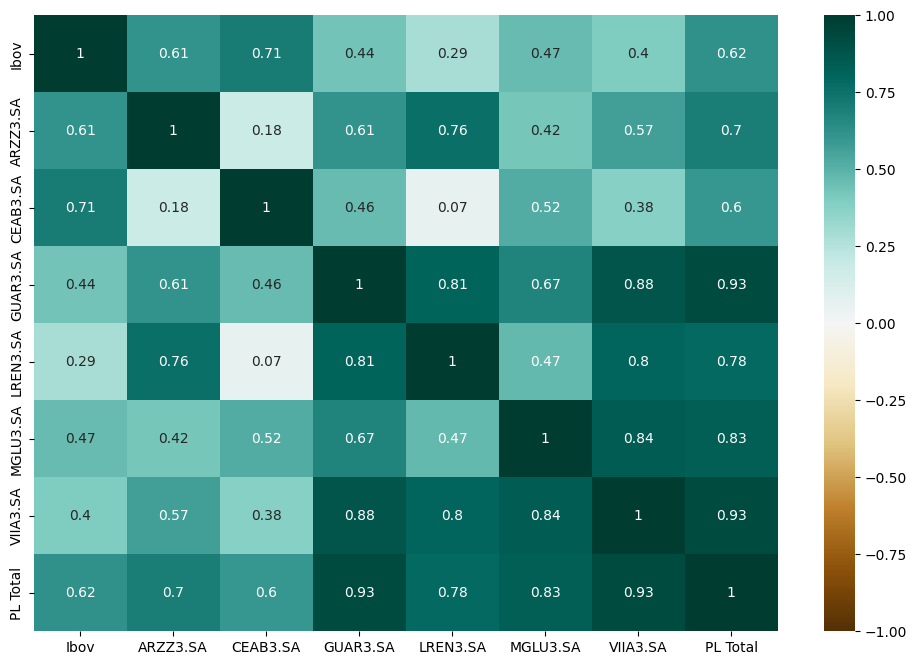

In [107]:
plt.figure(figsize = (12,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

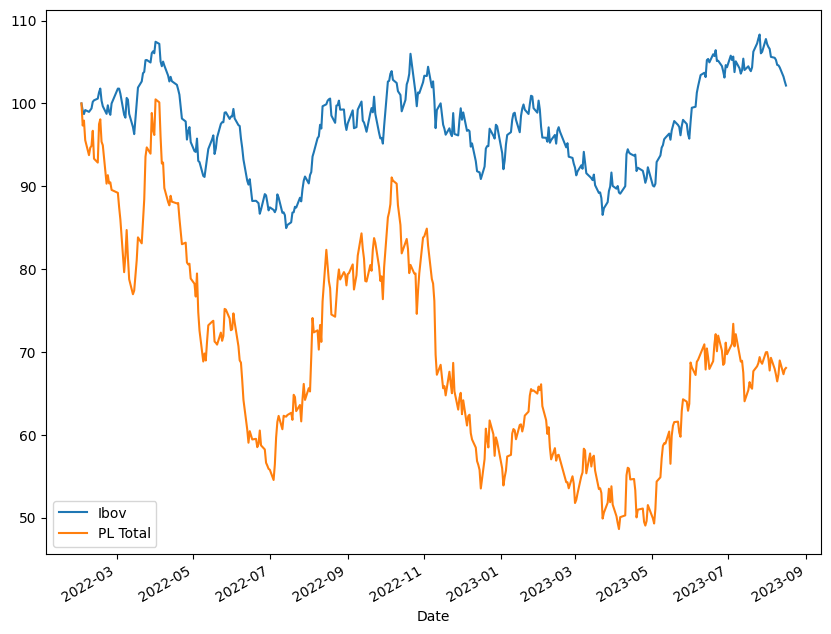

In [108]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [109]:
#retail ativos
ativos

['VIIA3.SA', 'MGLU3.SA', 'LREN3.SA', 'GUAR3.SA', 'CEAB3.SA', 'ARZZ3.SA']